In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install utils

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install opencv-python-headless==4.5.3.56

Note: you may need to restart the kernel to use updated packages.


In [1]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np

# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

2023-11-23 18:15:30.626371: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-23 18:15:31.099687: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-11-23 18:15:31.099728: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-11-23 18:15:31.099732: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [2]:
folders = ["00","01","02","03","04","05","06","07","08","09"]
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

# paths for dataset
data_path = "../kaggle_data"

In [13]:
# Loading the images and their class(0 - 9)
image_data = []
for dr in folders:
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass

In [14]:
image_data[0]

[array([[6, 6, 8, ..., 4, 5, 5],
        [5, 6, 7, ..., 4, 4, 4],
        [7, 7, 8, ..., 5, 4, 4],
        ...,
        [6, 5, 6, ..., 7, 6, 6],
        [6, 5, 7, ..., 6, 5, 6],
        [6, 6, 6, ..., 5, 6, 5]], dtype=uint8),
 0]

In [5]:
# shuffle the input data
import random
random.shuffle(image_data)

In [15]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

In [16]:
label[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

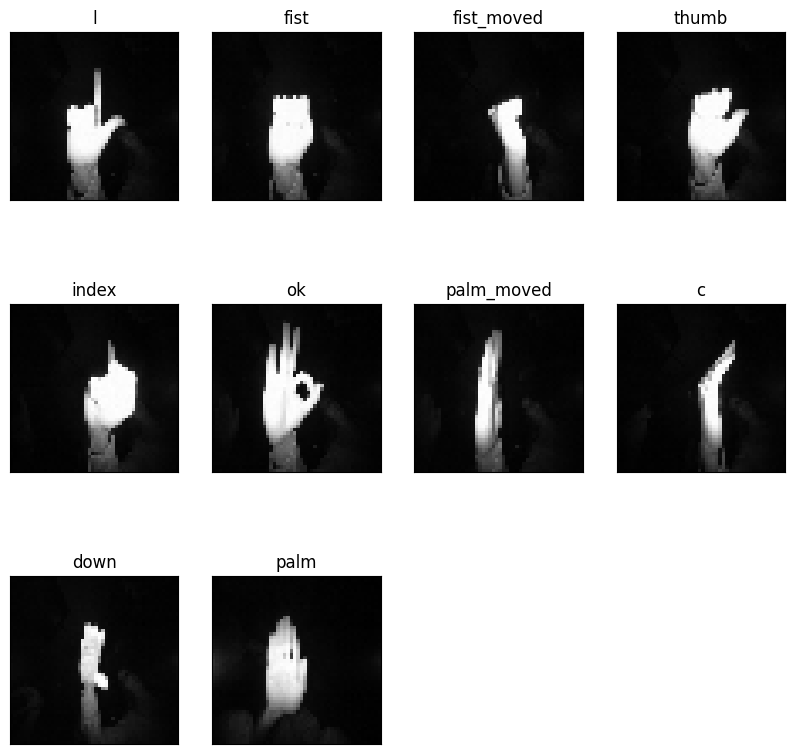

In [20]:
plt.figure(1, figsize=(10,10))
for i in range(1,11):
    plt.subplot(3,4,i)
    plt.imshow(image_data[i*200][0], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i*200]][3:])
plt.show()

In [9]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

In [10]:
# one hot encoding
label = keras.utils.to_categorical(label, num_classes=10,dtype='i1')
label[0]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int8)

In [11]:
# reshaping the data
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [12]:
# splitting the input_data to train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)

The Model

In [13]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

2023-07-01 12:59:15.840502: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-01 12:59:15.841107: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-01 12:59:15.845104: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-07-01 12:59:15.845117: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to do

In [16]:
pip install visualkeras


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install Pillow==9.5.0

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 33.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: Pillow
    Found existing installation: Pillow 10.1.0
    Uninstalling Pillow-10.1.0:
      Successfully uninstalled Pillow-10.1.0
Note: you may need to restart the kernel to use updated packages.


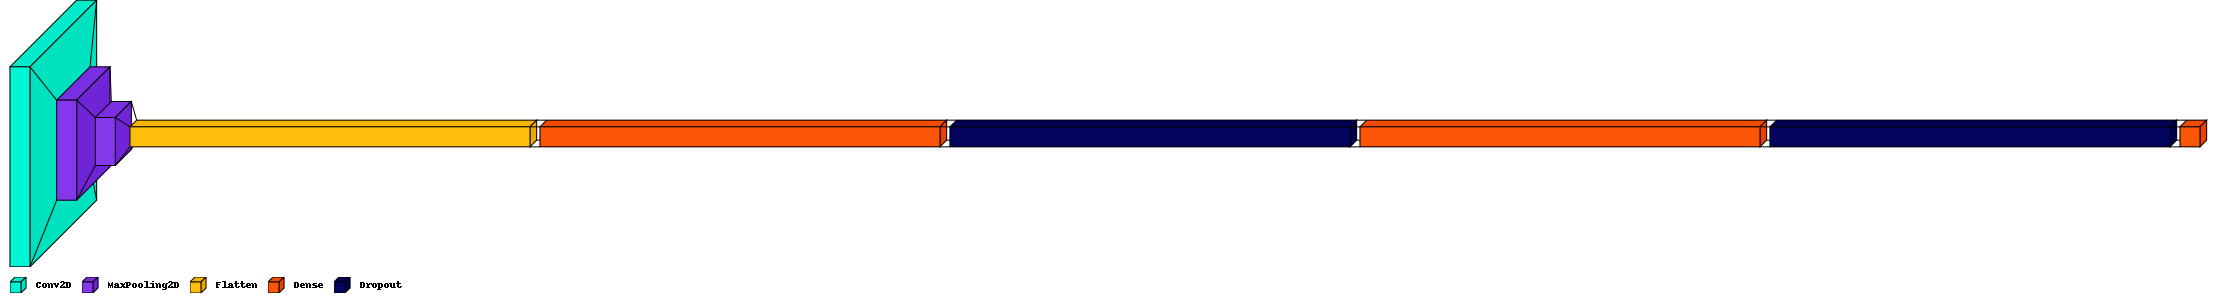

In [6]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
import visualkeras 
from PIL import ImageFont
from collections import defaultdict
# Define your IMG_SIZE and other parameters
IMG_SIZE = 50  # Replace with your actual IMG_SIZE value

model = keras.models.Sequential()

model.add(Conv2D(64, (3, 3), input_shape=(IMG_SIZE, IMG_SIZE, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

font = ImageFont.load_default()
color_map = defaultdict(dict)
color_map[layers.Conv2D]['fill'] = '#00f5d4'
color_map[layers.MaxPooling2D]['fill'] = '#8338ec'
color_map[layers.Dropout]['fill'] = '#03045e'
color_map[layers.Dense]['fill'] = '#fb5607'
color_map[layers.Flatten]['fill'] = '#ffbe0b'
visualkeras.layered_view(model, legend=True, font=font,color_map=color_map)


In [14]:
model.fit(X_train, y_train, epochs = 7, batch_size=25, validation_data=(X_test, y_test))

Epoch 1/7
560/560 [==============================] - 15s 26ms/step - loss: 0.3439 - accuracy: 0.8854 - val_loss: 0.0168 - val_accuracy: 0.9933
Epoch 2/7
560/560 [==============================] - 14s 25ms/step - loss: 0.0155 - accuracy: 0.9950 - val_loss: 0.0064 - val_accuracy: 0.9978
Epoch 3/7
560/560 [==============================] - 14s 24ms/step - loss: 0.0095 - accuracy: 0.9972 - val_loss: 0.0066 - val_accuracy: 0.9987
Epoch 4/7
560/560 [==============================] - 14s 24ms/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 0.0027 - val_accuracy: 0.9997
Epoch 5/7
560/560 [==============================] - 14s 24ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0034 - val_accuracy: 0.9988
Epoch 6/7
560/560 [==============================] - 14s 24ms/step - loss: 0.0024 - accuracy: 0.9991 - val_loss: 0.0012 - val_accuracy: 0.9998
Epoch 7/7
560/560 [==============================] - 14s 25ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0019 - val_accuracy: 0.9997

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 46, 46, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                        

In [16]:
#calculate loss and accuracy on test data

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

188/188 [==============================] - 1s 4ms/step - loss: 0.0019 - accuracy: 0.9997
Test accuracy: 99.97%


In [17]:
model.save("mymodel")

INFO:tensorflow:Assets written to: mymodel/assets


INFO:tensorflow:Assets written to: mymodel/assets


LRP_analyzer

In [18]:
import innvestigate
from __future__ import annotations

import inspect
import tensorflow as tf
import tensorflow.keras.backend as kbackend
import tensorflow.keras.layers as klayers

import innvestigate.analyzer.relevance_based.relevance_rule as rrule
import innvestigate.analyzer.relevance_based.utils as rutils
import innvestigate.analyzer.relevance_based.relevance_analyzer as ianalyzer
import innvestigate.analyzer.relevance_based.relevance_rule as irules
import innvestigate.backend as ibackend
import innvestigate.backend.checks as kchecks
import innvestigate.backend.graph as igraph
import innvestigate.utils as iutils
import innvestigate.layers as ilayers

from innvestigate.analyzer.network_base import AnalyzerNetworkBase
from innvestigate.analyzer.reverse_base import ReverseAnalyzerBase
from innvestigate.analyzer import LRP
from tensorflow.keras.applications import inception_v3
from innvestigate.backend.types import Layer, LayerCheck, Model, OptionalList, Tensor

tf.compat.v1.disable_eager_execution()

In [19]:
loadedModel = keras.models.load_model("mymodel")
noSoftMaxModel = innvestigate.model_wo_softmax(loadedModel)

2023-07-01 13:01:05.020164: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2023-07-01 13:01:05.031389: W tensorflow/c/c_api.cc:291] Operation '{name:'AssignVariableOp_2' id:155 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node AssignVariableOp_2}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false, _device="/device:CPU:0"](count_1, Identity_2)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


############ other method for getting data #############

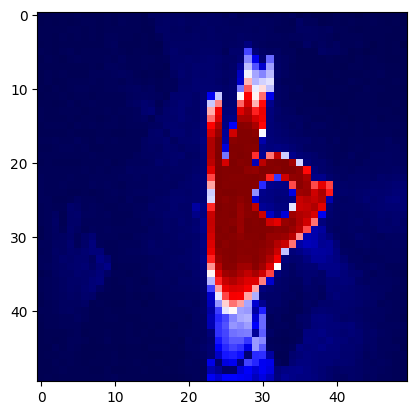

In [20]:
############ other method for getting data #############
image_shape = loadedModel.input_shape[1:]
image = image_data[0][0][None, :, :]
#image preprocess
preprocess = inception_v3.preprocess_input
image_pp = preprocess(image)
plt.imshow(image_pp.squeeze(), cmap="seismic", interpolation="nearest")
plt.show()

#new preprocessing method with keras imagenetutils#

In [17]:
#new preprocessing method with keras imagenetutils#
import keras.applications.imagenet_utils as imagenetkeras
predatatest = (imagenetkeras.preprocess_input(X_train),y_train,imagenetkeras.preprocess_input(X_test),y_test)
new_image_preprocess = predatatest[0][0]
plt.imshow(new_image_preprocess.squeeze(), cmap="seismic", interpolation="nearest")
plt.show()

IndexError: index 1 is out of bounds for axis 3 with size 1

In [16]:
a = LRP(noSoftMaxModel,rule="Z",input_layer_rule="Bounded",until_layer_idx=5,until_layer_rule="Gamma",bn_layer_rule="Z",neuron_selection_mode="index")

#########MAIN CODE###############

In [21]:
new_X_train = X_train[0][0][None, :, :]
new_X_test = X_test[0][0][None, :, :]
preprocess = inception_v3.preprocess_input
new_data = (preprocess(X_train),y_train,preprocess(X_test),y_test)

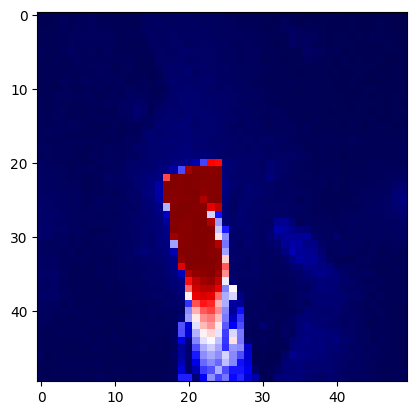

In [22]:
new_image = new_data[0][0]
plt.imshow(new_image.squeeze(), cmap="seismic", interpolation="nearest")
plt.show()

In [28]:
channels_first = kbackend.image_data_format() == "channels_first"
color_conversion = "BGRtoRGB"  # keras.applications use BGR format

In [23]:
#imagenet functionalities
import numpy as np

import innvestigate.utils as iutils
import innvestigate.utils.visualizations as ivis


def postprocess(X, color_conversion, channels_first):
    X = X.copy()
    X = iutils.postprocess_images(
        X, color_coding=color_conversion, channels_first=channels_first
    )
    return X


def image(X):
    X = X.copy()
    return ivis.project(X, absmax=255.0, input_is_positive_only=True)


def bk_proj(X):
    X = ivis.clip_quantile(X, 1)
    return ivis.project(X)


def heatmap(X):
    X = ivis.gamma(X, minamp=0, gamma=0.95)
    return ivis.heatmap(X)


def graymap(X):
    return ivis.graymap(np.abs(X), input_is_positive_only=True)


In [24]:
allLayer = ["2_block1_conv3","4_block2_conv4","8_block3_conv5","12_dense_2","13_dense_3"]
flatLayer = ["0_input_layer", "2_block1_conv3"]
alpha1Beta0Layer = ["4_block2_conv4","8_block3_conv5"]
epsilonLayer = ["12_dense_2","13_dense_3"]
lrpZeroLayer = ["12_dense_2","13_dense_3"]
    

#try LRP Z Rule

In [25]:
#try LRP Z Rule
class ZRule(igraph.ReverseMappingBase):
    """
    Basic LRP decomposition rule (for layers with weight kernels),
    which considers the bias a constant input neuron.
    """

    def __init__(self, layer, state, bias=True):
        # Copy forward layer, but without activations
        self._layer_wo_act = igraph.copy_layer_wo_activation(
            layer, keep_bias=bias, name_template="reversed_kernel_%s"
        )

    def apply(self, Xs, Ys, Rs, reverse_state):
        # Get activations.
        Zs = ibackend.apply(self._layer_wo_act, Xs)
        # Divide incoming relevance by the activations.
        tmp = [ilayers.SafeDivide()([a, b]) for a, b in zip(Rs, Zs)]
        # Propagate the relevance to input neurons
        # using the gradient.
        tmp = ibackend.gradients(Xs, Zs, tmp)
        # Re-weight relevance with the input values.
        return [keras.layers.Multiply()([a, b]) for a, b in zip(Xs, tmp)]

In [26]:
class LRP_Z_for_VGG(ReverseAnalyzerBase):
    def _default_reverse_mapping(self, Xs, Ys, reversed_Ys, reverse_state):
        return ibackend.gradients(Xs, Ys, reversed_Ys)

    def _head_mapping(self, X):
        # Keeping the output signal
        return X

    def _create_analysis(self, *args, **kwargs):

        self._add_conditional_reverse_mapping(
            # Apply to all layers that contain a kernel
            lambda layer: kchecks.contains_kernel(layer),
            ZRule,
            name="z_rule",
        )

        return super()._create_analysis(*args, **kwargs)

In [29]:
analyzer = LRP_Z_for_VGG(noSoftMaxModel)
a = analyzer.analyze(new_data)

# Postprocess
a = postprocess(a, color_conversion, channels_first)


2023-07-01 13:02:01.717188: W tensorflow/c/c_api.cc:291] Operation '{name:'kernel_13/Assign' id:698 op device:{requested: '', assigned: ''} def:{{{node kernel_13/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](kernel_13, kernel_13/Initializer/stateless_random_uniform)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-07-01 13:02:01.770063: W tensorflow/c/c_api.cc:291] Operation '{name:'gradients_14/MaxNeuronSelection_1/Max_grad/mod' id:747 op device:{requested: '', assigned: ''} def:{{{node gradients_14/MaxNeuronSelection_1/Max_grad/mod}} = FloorMod[T=DT_INT32, _class=["loc:@MaxNeuronSelection_1/Max"], _has_manual_control_dependencies=true](gradients_14/MaxNeuronSelection_1/Max_grad/add, gradients_14/MaxNeuronSelection_1/Max_grad/Size)}}' was changed by setting att

#####new projection method#####

In [30]:
def projection(X, output_range=(0, 1), absmax=None, input_is_positive_only=False):
    
    if absmax is None:
        absmax = np.max(np.abs(X), axis=tuple(range(1, len(X.shape))))
    absmax = np.asarray(absmax)
    
    mask = absmax != 0
    absmax_reshaped = np.reshape(absmax, (14000, 1, 1))

    if mask.sum() > 0:
        X[mask] /= absmax_reshaped[mask]

    if input_is_positive_only is False:
        X = (X + 1) / 2  # [0, 1]
    X = X.clip(0, 1)

    X = output_range[0] + (X * (output_range[1] - output_range[0]))
    
    return X


In [31]:
def heatmap1(
    X, cmap_type="seismic", reduce_op="sum", reduce_axis=-1, alpha_cmap=False, **kwargs
):
    cmap = plt.cm.get_cmap(cmap_type)

    tmp = X
    shape = tmp.shape

    if reduce_op == "sum":
        tmp = tmp.sum(axis=reduce_axis)
    elif reduce_op == "absmax":
        pos_max = tmp.max(axis=reduce_axis)
        neg_max = (-tmp).max(axis=reduce_axis)
        abs_neg_max = -neg_max
        tmp = np.select(
            [pos_max >= abs_neg_max, pos_max < abs_neg_max], [pos_max, neg_max]
        )
    else:
        raise NotImplementedError()

    tmp = projection(tmp, output_range=(0, 255), **kwargs).astype(np.int64)

    if alpha_cmap:
        tmp = cmap(tmp.flatten()).T
    else:
        tmp = cmap(tmp.flatten())[:, :3].T
    tmp = tmp.T

    shape = list(shape)
    shape[reduce_axis] = 3 + alpha_cmap

    return tmp.reshape(shape).astype(np.float32)


##showing the heatmap

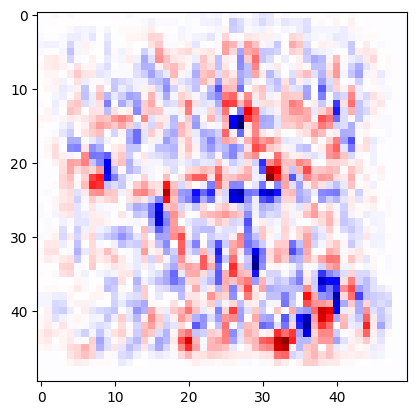

In [32]:
# Displaying the heatmaps
plt.imshow(heatmap1(a)[0])
plt.show()

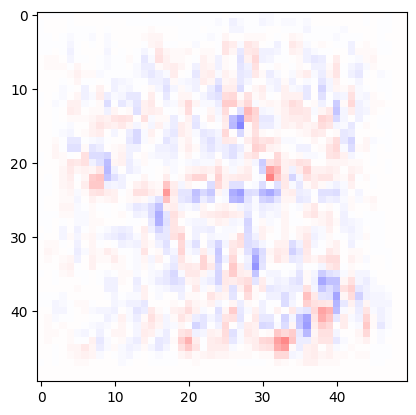

In [33]:
plt.imshow(a[0], cmap="seismic", clim=(-1, 1))

In [25]:
###example 2 for convolutional and dense layer
class Example2(ReverseAnalyzerBase):
    def _default_reverse_mapping(self, Xs, Ys, reversed_Ys, reverse_state):
        # Apply the chain rule
        reversed_Xs = ibackend.gradients(Xs, Ys, reversed_Ys)
        return reversed_Xs

    def _head_mapping(self, X):
        """
        Initialize the mapping with ones.
        """
        return ilayers.OnesLike()(X)


In [34]:
analyzer = Example2(noSoftMaxModel)
b = analyzer.analyze(new_data)

2023-06-24 18:53:16.465130: W tensorflow/c/c_api.cc:291] Operation '{name:'conv2d/Conv2D/ReadVariableOp' id:203 op device:{requested: '', assigned: ''} def:{{{node conv2d/Conv2D/ReadVariableOp}} = ReadVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT](kernel)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-24 18:53:16.496906: W tensorflow/c/c_api.cc:291] Operation '{name:'conv2d/Conv2D/ReadVariableOp' id:203 op device:{requested: '', assigned: ''} def:{{{node conv2d/Conv2D/ReadVariableOp}} = ReadVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT](kernel)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-24 18:53:16.5280

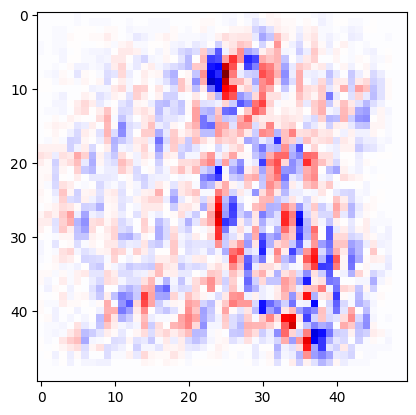

In [35]:

# Postprocess
b = postprocess(b, color_conversion, channels_first)
plt.imshow(heatmap1(b)[0])
plt.show()

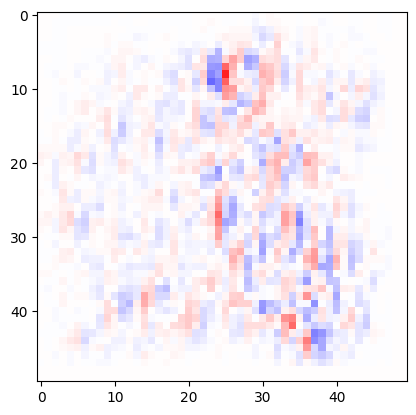

In [36]:
plt.imshow(b[0], cmap="seismic", clim=(-1, 1))

In [28]:
class Example3(ReverseAnalyzerBase):
    def _default_reverse_mapping(self, Xs, Ys, reversed_Ys, reverse_state):
        return ibackend.gradients(Xs, Ys, reversed_Ys)

    def _head_mapping(self, X):
        # Keeping the output signal
        return X

    def guided_backprop_mapping(self, Xs, Ys, reversed_Ys, reverse_state):
        activation = keras.layers.Activation("relu")
        # Apply relus conditioned on backpropagated values.
        reversed_Ys = ibackend.apply(activation, reversed_Ys)

        # Apply gradient of forward pass.
        return ibackend.gradients(Xs, Ys, reversed_Ys)

    def _create_analysis(self, *args, **kwargs):

        self._add_conditional_reverse_mapping(
            # Apply to all layers that contain a relu activation
            lambda layer: kchecks.contains_activation(layer, "relu"),
            self.guided_backprop_mapping,
            name="guided_backprop_reverse_relu_layer",
        )

        return super()._create_analysis(*args, **kwargs)

In [30]:
analyzer1 = Example3(noSoftMaxModel)
c = analyzer1.analyze(new_data)

2023-06-24 18:52:03.989030: W tensorflow/c/c_api.cc:291] Operation '{name:'dense/MatMul/ReadVariableOp' id:376 op device:{requested: '', assigned: ''} def:{{{node dense/MatMul/ReadVariableOp}} = ReadVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT](kernel_4)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-06-24 18:52:04.020577: W tensorflow/c/c_api.cc:291] Operation '{name:'gradients_28/MaxNeuronSelection_2/Max_grad/range' id:654 op device:{requested: '', assigned: ''} def:{{{node gradients_28/MaxNeuronSelection_2/Max_grad/range}} = Range[Tidx=DT_INT32, _class=["loc:@MaxNeuronSelection_2/Max"], _has_manual_control_dependencies=true](gradients_28/MaxNeuronSelection_2/Max_grad/range/start, gradients_28/MaxNeuronSelection_2/Max_grad/Size, gradients_28/MaxNeuronSelection_2/Max_grad/range/delta)}}' was chang

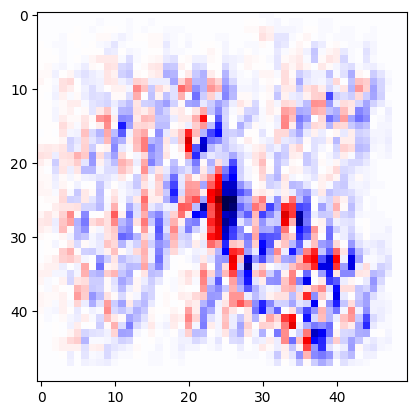

In [33]:

# Postprocess
c = postprocess(c, color_conversion, channels_first)
plt.imshow(heatmap1(c)[0])
plt.show()

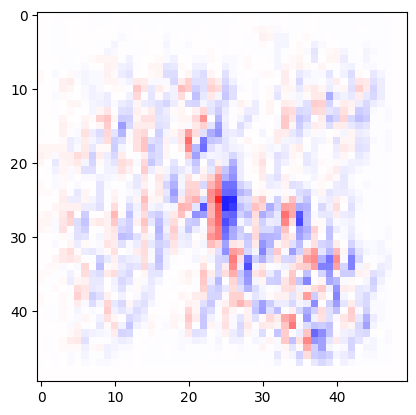

In [37]:
plt.imshow(c[0], cmap="seismic", clim=(-1, 1))